# Candidatos, doações e doadores

A partir dos dados da prestação de contas das eleições feitas ao Tribunal Superior
Eleitoral (TSE) analisamos os dados das doações recebidas por candidatos a prefeitura
de Feira de Santana.

Vale salientar que os dados são atualizados pelo TSE diariamente. Atenção a data
que essa análise foi publicada e a data de _download_ do arquivo.

### Instruções download dos dados

A análise foi feita com arquivos do [repositório de dados eleitorais do TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais).

Faça o download do arquivo: http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2020.zip (download feito em 31/10/2020)

Siga o seguinte caminho dentro da pasta:
```
Prestação de contas eleitorais > 2020 > Candidatos (formato zip) > receitas_candidatos_2020_BA.csv
```

Copie o arquivo do estado desejado (`receitas_candidatos_2020_<estado>.csv`)
para a pasta `analysis` nesse repositório.

Dicionário de dados: `leiame_receitas-candidatos.pdf`

Observações sobre os dados:

* `#NULO` é o mesmo que `None`
* `#NE` significa que naquele ano a informação não era registrada
* Campo `UF`: `BR` para nível nacional, `VT` voto em trânsito e `ZZ` para Exterior
* Campo `NM_UE`, no caso de eleições municipais, é o nome do município

In [1]:
import pandas as pd
from scripts.parsers import currency_to_float, is_company


df = pd.read_csv("receitas_candidatos_2020_BA.csv", encoding="latin", delimiter=";")

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df_feira = df[df["NM_UE"] == "FEIRA DE SANTANA"].copy()

In [105]:
df_feira["VR_RECEITA"] = df_feira["VR_RECEITA"].apply(currency_to_float)

Abaixo uma amostra aleatória de 5 doações recebidas:

In [107]:
fields = [
    "NM_CANDIDATO", "SG_PARTIDO", "NM_PARTIDO", "DS_FONTE_RECEITA",
    "DS_ORIGEM_RECEITA",
    "DS_CNAE_DOADOR", "NR_CPF_CNPJ_DOADOR", "NM_DOADOR", "NM_DOADOR_RFB",
    "SG_UF_DOADOR", "CD_MUNICIPIO_DOADOR",
    "NM_MUNICIPIO_DOADOR", "NM_PARTIDO_DOADOR", "DT_RECEITA", "DS_RECEITA", "VR_RECEITA",
    "DS_CARGO",
]

df_filtered = df_feira[fields]

## Doações recebidas por candidatos a prefeito

In [108]:
mayor_df = df_filtered[df_filtered["DS_CARGO"] == "Prefeito"]
mayor_df.sample(5)  # doação a prefeitos de Feira de Santana

,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,NM_PARTIDO_DOADOR,DT_RECEITA,DS_RECEITA,VR_RECEITA,DS_CARGO
37383,ORLANDO ANDRADE DE JESUS,PCO,Partido da Causa Operária,Fundo Especial,Recursos de partido político,Atividades de organizações políticas,1307059000190,Direção Nacional,PARTIDO DA CAUSA OPERARIA,BR,-1,#NULO#,Partido da Causa Operária,20/10/2020,PRESTACAO DE SERVICOS CONTABEIS,500.00,Prefeito
37212,JOSE CERQUEIRA DE SANTANA NETO,PT,Partido dos Trabalhadores,Outros Recursos,Recursos de pessoas físicas,#NULO#,8107670582,ANTONIO SANTOS FILGUEIRAS,ANTONIO SANTOS FILGUEIRAS,#NULO#,-1,#NULO#,#NULO#,26/10/2020,#NULO#,30000.00,Prefeito
37134,COLBERT MARTINS DA SILVA FILHO,MDB,Movimento Democrático Brasileiro,Fundo Especial,Recursos de partido político,Atividades de organizações políticas,1633510000169,Direção Nacional,DEMOCRATAS - DIRETORIO NACIONAL,BR,-1,#NULO#,Democratas,16/10/2020,#NULO#,100000.00,Prefeito
36733,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,DIREÇÃO NACIONAL,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,05/10/2020,VIDEO GRAVADO COM O ZEMA,157.14,Prefeito
36739,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,97356808587,PEDRO FALCAO VIEIRA NETO,PEDRO FALCAO VIEIRA NETO,#NULO#,-1,#NULO#,#NULO#,28/09/2020,PRESTACAO DE SERVICO COMO ADMINISTRADOR FINANC...,1045.00,Prefeito


### Total, mediana e número de doações recebidas por candidato

In [7]:
mayor_df.groupby(
    ["NM_CANDIDATO"]
)["VR_RECEITA"].agg(["sum", "median", "count"]).sort_values(ascending=False, by=["sum", "NM_CANDIDATO"])

,sum,median,count
NM_CANDIDATO,,,
DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL,1485000.00,345000.0,4
JOSE CERQUEIRA DE SANTANA NETO,714739.50,12375.0,12
CARLOS GEILSON DOS SANTOS SILVA,150000.00,75000.0,2
COLBERT MARTINS DA SILVA FILHO,118701.50,2700.0,5
JOSE DE ARIMATEIA CORIOLANO DE PAIVA,75000.00,1050.0,6
CARLOS MEDEIROS MIRANDA,44862.14,5000.0,11
MARCELA PREST,16660.00,365.0,6
ROBERTO LUIS DA SILVA TOURINHO,10150.00,5000.0,3
ORLANDO ANDRADE DE JESUS,1000.00,500.0,2


### Quem são os doadores?

In [8]:
mayor_df.groupby(
    ["NM_CANDIDATO", "NM_DOADOR_RFB", "NR_CPF_CNPJ_DOADOR", "NM_PARTIDO_DOADOR"]
)["VR_RECEITA"].agg(["sum"])

sum
NM_CANDIDATO                                NM_DOADOR_RFB                                      NR_CPF_CNPJ_DOADOR NM_PARTIDO_DOADOR                           
CARLOS GEILSON DOS SANTOS SILVA             CARLOS GEILSON DOS SANTOS SILVA                    22475532572        Podemos                             50000.00
                                            PODEMOS                                            4078889000180      Podemos                            100000.00
CARLOS MEDEIROS MIRANDA                     CARLOS MEDEIROS MIRANDA                            70580960587        Partido Novo                        15700.00
                                            KARLSON GERALDO DE SOUZA SILVA                     3123957446         #NULO#                                200.00
                                            LEONARDO PRAZERES ALVES                            76992926500        #NULO#                               5000.00
                                            LUCAS BERENGUER REGIS                              88636747520        #NULO#                               5000.00
                                            PABIO VINICIO ANDRADE                              61402931549        #NULO#                                200.00
                                            PARTIDO NOVO                                       13405866000124     Partido Novo                          157.14
                                            PEDRO FALCAO VIEIRA NETO                           97356808587        #NULO#                               6045.00
                                            VALDECIR ROBERTO BECHEL                            58530339991        #NULO#                               1000.00
                                            VALFREDO NOVAIS SILVA                              36089257591        #NULO#                              11560.00
COLBERT MARTINS DA SILVA FILHO              COLBERT MARTINS DA SILVA FILHO                     13236164549        Movimento Democrático Brasileiro     3700.00
                                            DEMOCRATAS - DIRETORIO NACIONAL                    1633510000169      Democratas                         100000.00
                                            FANAEL RIBEIRO DOS SANTOS                          7984022534         #NULO#                                  1.50
                                            WILSON FERREIRA FALCAO                             19309287500        #NULO#                              15000.00
DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL PARTIDO SOCIAL LIBERAL                             1209414000198      Partido Social Liberal            1170000.00
                                            PSL - PARTIDO SOCIAL LIBERAL COMISSAO PROVISORIA   25426153000126     Partido Social Liberal             315000.00
JOSE CERQUEIRA DE SANTANA NETO              ANTONIO SANTOS FILGUEIRAS                          8107670582         #NULO#                              30000.00
                                            JOSE CERQUEIRA DE SANTANA NETO                     38247186500        Partido dos Trabalhadores           65000.00
                                            LUIZ FERNANDO LUZ PESSOA DE SOUZA                  1995898520         #NULO#                              19750.00
                                            PARTIDO DOS TRABALHADORES                          676262000170       Partido dos Trabalhadores           30000.00
                                                                                               13477302000105     Partido dos Trabalhadores          569989.50
JOSE DE ARIMATEIA CORIOLANO DE PAIVA        JOSE DE ARIMATEIA CORIOLANO DE PAIVA               29305292453        REPUBLICANOS                         5000.00
                                            REPUBLICANOS - BAHIA - ESTADUAL                    8666672000142      REPUBLICANOS                        70000.00
MARCELA PREST        

## Um mesmo doador doou pra mais de um candidato?

In [110]:
mayor_df[["NM_DOADOR_RFB", "NM_CANDIDATO"]].value_counts()

NM_DOADOR_RFB                                                 NM_CANDIDATO                               
JOSE CERQUEIRA DE SANTANA NETO                                JOSE CERQUEIRA DE SANTANA NETO                 7
JOSE DE ARIMATEIA CORIOLANO DE PAIVA                          JOSE DE ARIMATEIA CORIOLANO DE PAIVA           5
PARTIDO DOS TRABALHADORES                                     JOSE CERQUEIRA DE SANTANA NETO                 3
PARTIDO SOCIAL LIBERAL                                        DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL    2
DAVI MENDES LEITE                                             MARCELA PREST                                  2
COMISSAO PROVISORIA DO PARTIDO SOCIALISMO E LIBERDADE - PSOL  MARCELA PREST                                  2
COLBERT MARTINS DA SILVA FILHO                                COLBERT MARTINS DA SILVA FILHO                 2
PARTIDO DA CAUSA OPERARIA                                     ORLANDO ANDRADE DE JESUS                       2
CARLOS

### Qual partido é mais generoso?

As doações feitas por partidas podem ser identificadas pela coluna `NM_PARTIDO_DOADOR`.
O valor `#NULO#` representa as doações feitas todas as outras entidades que não são
partidos (como pessoas e aplicativos de doação).

In [63]:
donations_by_party = mayor_df.groupby(
    ["NM_PARTIDO_DOADOR"], as_index=False
)["VR_RECEITA"].agg(["sum"]).sort_values(
    ascending=False, by=["sum", "NM_PARTIDO_DOADOR"]
)
donations_by_party

,sum
NM_PARTIDO_DOADOR,
Partido Social Liberal,1485000.00
Partido dos Trabalhadores,664989.50
Podemos,150000.00
Democratas,100000.00
#NULO#,94796.50
REPUBLICANOS,75000.00
Partido Novo,15857.14
Partido Socialismo e Liberdade,15770.00
Partido Socialista Brasileiro,10000.00


<AxesSubplot:title={'center':'Doações feitas por partidos'}, xlabel='Partidos'>

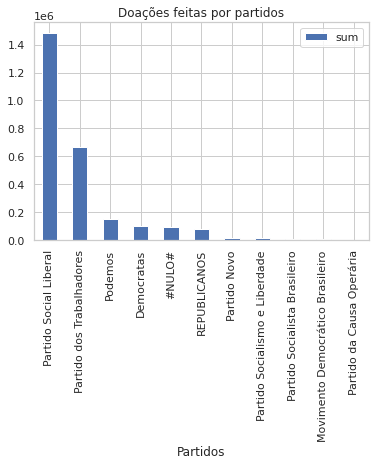

In [67]:
donations_by_party.plot.bar(xlabel="Partidos", stacked=True, title="Doações feitas por partidos")

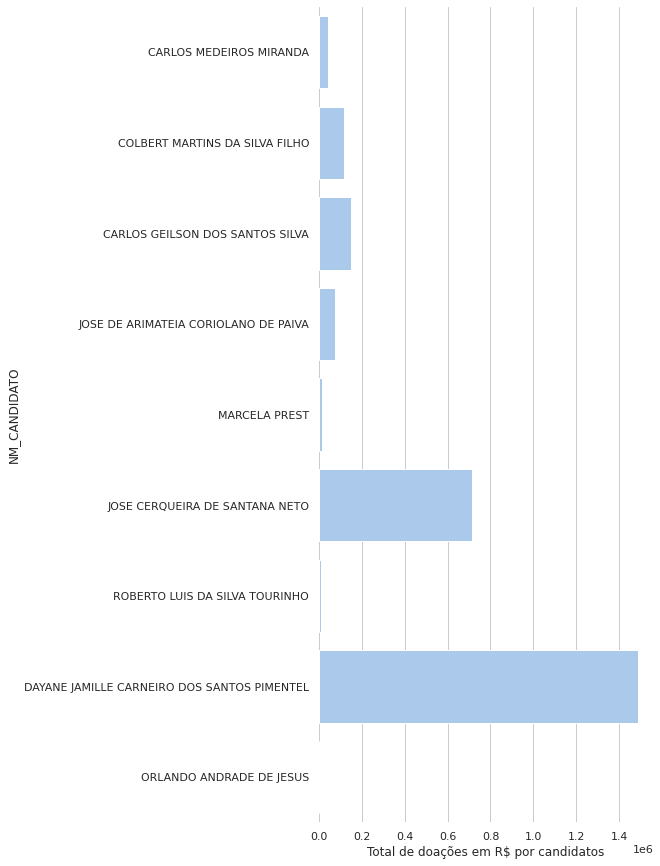

In [80]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

sns.set_color_codes("pastel")

sns.barplot(x="VR_RECEITA", y="NM_CANDIDATO", data=mayor_df, label="Total", color="b", ci=None, estimator=sum)

ax.set(xlabel="Total de doações em R$ por candidatos")
sns.despine(left=True, bottom=True)

### Quantos estão doando para si mesmo?

In [ ]:
# checa se existem homônimos
print(len(pd.unique(mayor_df["NM_DOADOR_RFB"])), len(pd.unique(mayor_df["NR_CPF_CNPJ_DOADOR"])))

# número de candidatos
print(len(pd.unique(mayor_df["NM_CANDIDATO"])))

# quantas doações foram pra si mesmo?
mayor_df["NM_DOADOR_RFB"].eq(mayor_df["NM_CANDIDATO"]).value_counts()

### Qual a origem dos recursos?

In [81]:
mayor_df.groupby(["NM_CANDIDATO", "DS_ORIGEM_RECEITA"])["VR_RECEITA"].agg(["sum"])

sum
NM_CANDIDATO                                DS_ORIGEM_RECEITA                             
CARLOS GEILSON DOS SANTOS SILVA             Recursos de partido político         100000.00
                                            Recursos próprios                     50000.00
CARLOS MEDEIROS MIRANDA                     Recursos de partido político            157.14
                                            Recursos de pessoas físicas           29005.00
                                            Recursos próprios                     15700.00
COLBERT MARTINS DA SILVA FILHO              Recursos de partido político         100000.00
                                            Recursos de pessoas físicas           15001.50
                                            Recursos próprios                      3700.00
DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL Recursos de partido político        1485000.00
JOSE CERQUEIRA DE SANTANA NETO              Recursos de partido político         599989.50
                                            Recursos de pessoas físicas           49750.00
                                            Recursos próprios                     65000.00
JOSE DE ARIMATEIA CORIOLANO DE PAIVA        Recursos de partido político          70000.00
                                            Recursos próprios                      5000.00
MARCELA PREST                               Recursos de Financiamento Coletivo      730.00
                                            Recursos de partido político          15770.00
                                            Recursos de pessoas físicas             160.00
ORLANDO ANDRADE DE JESUS                    Recursos de partido político           1000.00
ROBERTO LUIS DA SILVA TOURINHO              Recursos de partido político          10000.00
                                            Recursos de pessoas físicas             150.00

[Text(0, 0, 'CARLOS MEDEIROS MIRANDA'),
 Text(1, 0, 'COLBERT MARTINS DA SILVA FILHO'),
 Text(2, 0, 'CARLOS GEILSON DOS SANTOS SILVA'),
 Text(3, 0, 'JOSE DE ARIMATEIA CORIOLANO DE PAIVA'),
 Text(4, 0, 'MARCELA PREST'),
 Text(5, 0, 'JOSE CERQUEIRA DE SANTANA NETO'),
 Text(6, 0, 'ROBERTO LUIS DA SILVA TOURINHO'),
 Text(7, 0, 'DAYANE JAMILLE CARNEIRO DOS SANTOS PIMENTEL'),
 Text(8, 0, 'ORLANDO ANDRADE DE JESUS')]

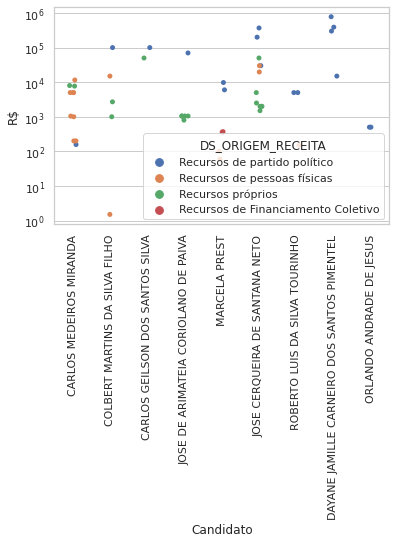

In [112]:
ax = sns.stripplot(
    x="NM_CANDIDATO", y="VR_RECEITA", hue="DS_ORIGEM_RECEITA", data=mayor_df#, xlabel="Candidato", ylabel="R$"
)
ax.set_xlabel("Candidato")
ax.set_yscale("log")
ax.set_ylabel("R$")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Tem diferença entre candidatos?

## Ranking de Doadores

In [99]:
mayor_df.groupby(["NM_DOADOR_RFB", "NM_DOADOR"])["VR_RECEITA"].agg(
    ["sum"]
).sort_values(ascending=False, by=["sum", "NM_DOADOR_RFB"])

,,sum
NM_DOADOR_RFB,NM_DOADOR,
PARTIDO SOCIAL LIBERAL,Direção Nacional,1170000.00
PARTIDO DOS TRABALHADORES,Direção Estadual/Distrital,569989.50
PSL - PARTIDO SOCIAL LIBERAL COMISSAO PROVISORIA,Direção Municipal/Comissão Provisória,315000.00
PODEMOS,Direção Estadual/Distrital,100000.00
DEMOCRATAS - DIRETORIO NACIONAL,Direção Nacional,100000.00
REPUBLICANOS - BAHIA - ESTADUAL,Direção Estadual/Distrital,70000.00
JOSE CERQUEIRA DE SANTANA NETO,JOSE CERQUEIRA DE SANTANA NETO,65000.00
CARLOS GEILSON DOS SANTOS SILVA,CARLOS GEILSON SANTOS SILVA,50000.00
PARTIDO DOS TRABALHADORES,Direção Nacional,30000.00


## Veja todas as doações

In [103]:
pd.set_option('display.max_rows', None)
mayor_df

,NM_CANDIDATO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,NM_PARTIDO_DOADOR,DT_RECEITA,DS_RECEITA,VR_RECEITA,DS_CARGO
36733,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de partido político,Atividades de organizações políticas,13405866000124,DIREÇÃO NACIONAL,PARTIDO NOVO,BR,-1,#NULO#,Partido Novo,05/10/2020,VIDEO GRAVADO COM O ZEMA,157.14,Prefeito
36734,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,76992926500,LEONARDO PRAZERES ALVES,LEONARDO PRAZERES ALVES,#NULO#,-1,#NULO#,#NULO#,29/09/2020,#NULO#,5000.00,Prefeito
36735,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,97356808587,PEDRO FALCAO VIEIRA NETO,PEDRO FALCAO VIEIRA NETO,#NULO#,-1,#NULO#,#NULO#,28/10/2020,#NULO#,5000.00,Prefeito
36736,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,88636747520,LUCAS,LUCAS BERENGUER REGIS,#NULO#,-1,#NULO#,#NULO#,07/10/2020,#NULO#,5000.00,Prefeito
36737,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,3123957446,KARLSON G,KARLSON GERALDO DE SOUZA SILVA,#NULO#,-1,#NULO#,#NULO#,21/10/2020,#NULO#,200.00,Prefeito
36738,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,58530339991,VALDECIR,VALDECIR ROBERTO BECHEL,#NULO#,-1,#NULO#,#NULO#,16/10/2020,#NULO#,1000.00,Prefeito
36739,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,97356808587,PEDRO FALCAO VIEIRA NETO,PEDRO FALCAO VIEIRA NETO,#NULO#,-1,#NULO#,#NULO#,28/09/2020,PRESTACAO DE SERVICO COMO ADMINISTRADOR FINANC...,1045.00,Prefeito
36740,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,36089257591,VALFREDO,VALFREDO NOVAIS SILVA,#NULO#,-1,#NULO#,#NULO#,02/10/2020,#NULO#,11560.00,Prefeito
36741,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos de pessoas físicas,#NULO#,61402931549,PABIO VINICIO,PABIO VINICIO ANDRADE,#NULO#,-1,#NULO#,#NULO#,15/10/2020,#NULO#,200.00,Prefeito
36742,CARLOS MEDEIROS MIRANDA,NOVO,Partido Novo,Outros Recursos,Recursos próprios,#NULO#,70580960587,CARLOS MEDEIROS MIRANDA,CARLOS MEDEIROS MIRANDA,BA,35157,FEIRA DE SANTANA,Partido Novo,19/10/2020,#NULO#,7700.00,Prefeito
